In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
plt.style.use('bmh')

In [89]:
df=pd.read_csv("CarPrice_Assignment.csv")


In [90]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


- Descrição da base.

In [91]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [92]:
df.drop(['car_ID', 'symboling','CarName'], axis=1, inplace=True)

- Aqui, vamos excluir algumas colunas que não vão ser tão importantes para a analise.

In [93]:
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


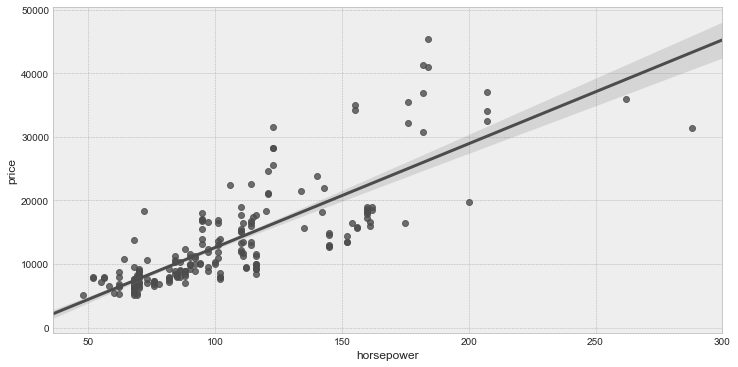

In [94]:
plt.figure(figsize=(12,6))
sns.regplot(data=df, x='horsepower', y='price',ci=68, truncate=False,color=".3");


- Aqui, podemos ver que existe uma relação, principalmente quando tempos pouco HP (Horse Power), os valores tentem a obedecer uma reta.

Text(0, 0.5, 'Quantidade')

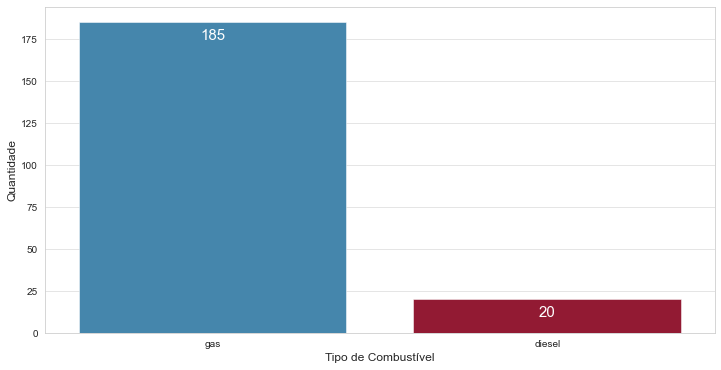

In [95]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
ax=sns.countplot(x='fueltype',data=df)
for p in ax.patches:
    ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()-10),ha='center',fontsize=15,color='white')
ax.set_xlabel('Tipo de Combustível')
ax.set_ylabel('Quantidade')

In [106]:
print("Em suma, {:0.2f}% dos carros são movisos a gasolina.".format(len(df[df['fueltype']=='gas'])/(len(df[df['fueltype']=='gas'])+len(df[df['fueltype']=='diesel']))*100))

Em suma, 90.24% dos carros são movisos a gasolina.


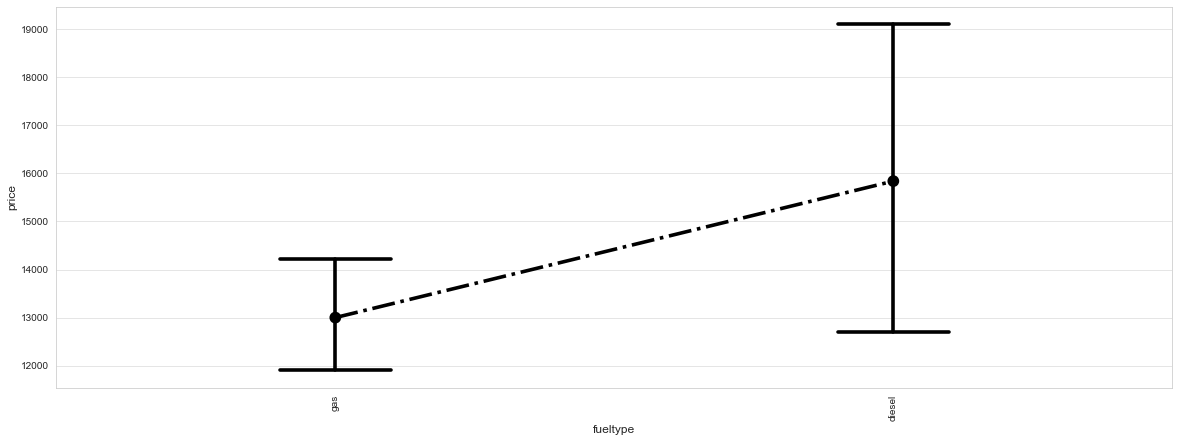

In [107]:
from numpy import median
plt.figure(figsize=(20,7))
ax = sns.pointplot(y="price", x='fueltype',data=df,color='black',capsize=.2,linestyles=["-."])
plt.xticks(rotation=90)

plt.show()

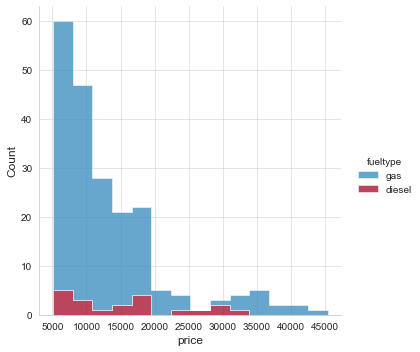

In [108]:
sns.displot(x='price',hue='fueltype',data=df,element="step",multiple="stack")


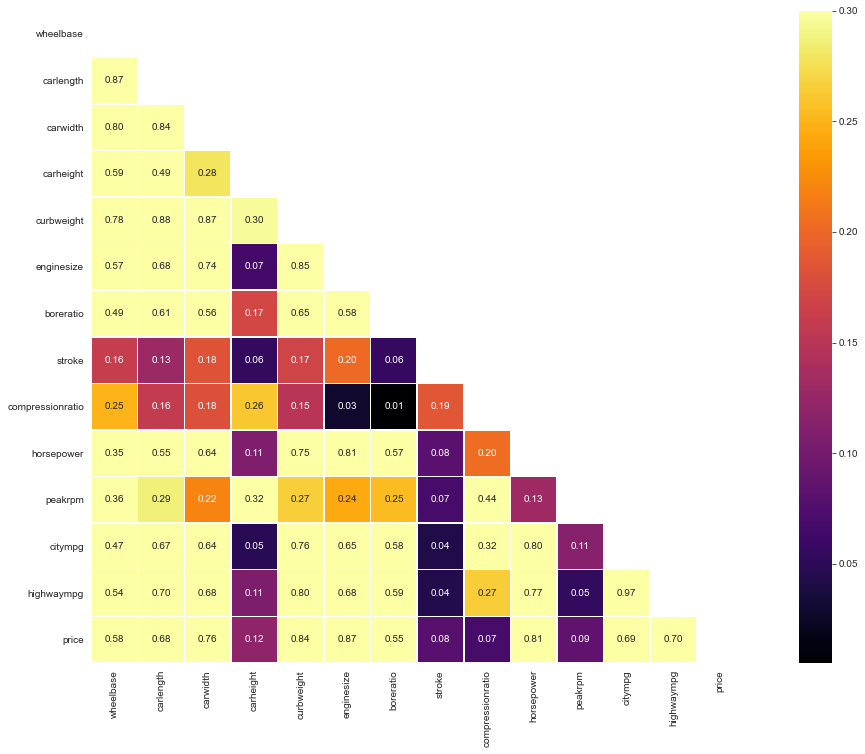

In [109]:
corr_data = df.corr()

mask = np.zeros_like(corr_data)

mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,12))

sns.heatmap(corr_data.abs(),cmap='inferno', annot=True, fmt='.2f',square=True,mask=mask, vmax=.3,linewidths=.5)
plt.show()

In [110]:
cat_data = df.select_dtypes(include = 'object')
num_data = df.select_dtypes(exclude = 'object')
#Fazer a troca de palavras pro números para que as analises possam ser feitas.
for i in cat_data.columns:
    cat_data[i] = LabelEncoder().fit_transform(cat_data[i])

In [111]:
df = pd.concat([cat_data, num_data], axis = 1)
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,wheelbase,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,0,2,5,88.6,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,2,0,0,2,5,88.6,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,2,0,5,3,5,94.5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,3,1,0,3,2,5,99.8,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,3,0,0,3,1,5,99.4,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [112]:
x_treino,x_teste,y_treino,y_teste=train_test_split(df.drop('price',axis=1),df['price'],test_size=0.15)

In [113]:
print('O dataset de treino possui {} clientes e o de teste {} clientes.'.format(x_treino.shape[0], x_teste.shape[0]))

O dataset de treino possui 174 clientes e o de teste 31 clientes.


In [114]:
LR=LinearRegression()
LR.fit(x_treino,y_treino)

LinearRegression()

In [115]:
LR.fit(x_treino, y_treino)
y_predLR = LR.predict(x_teste)

In [123]:
ln = round(LR.score(x_treino,y_treino) * 100, 2)
print("Acurácia do modelo de Regressão Linear Múltipla: {}%".format(ln))

Acurácia do modelo de Regressão Linear Múltipla: 87.95%
